In [1]:
import numpy as np
from scipy.optimize import approx_fprime

### Задание 1

Придумайте функции со следующими свойствами (в a) b) c) область определения X любая, какая вам удобна, главное - функция с нужными свойствами):

a) бесконечное количество локальных экстремумов

b) 2 локальных экстремума

с) 3 локальных экстремума

d*) область определения функции - 1 точка

In [2]:
import matplotlib.pyplot as plt

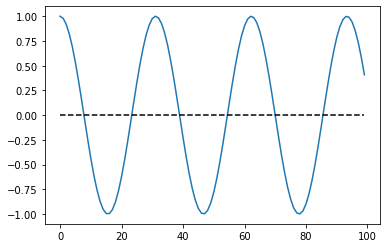

In [3]:
# бесконечное количество локальных экстремумов
x = np.array([np.cos(x) for x in np.linspace(0, 20, 100)])
plt.plot(x)
plt.plot(np.zeros_like(x), "--", color="black")
plt.show()

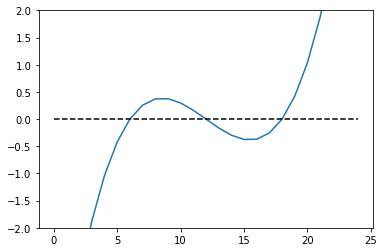

In [68]:
# 2 локальных экстремума
x = np.array([(x**3-x) for x in np.linspace(-2, 2, 25)])
plt.plot(x)
plt.ylim(-2,2)
plt.plot(np.zeros_like(x), "--", color="black")
plt.show()

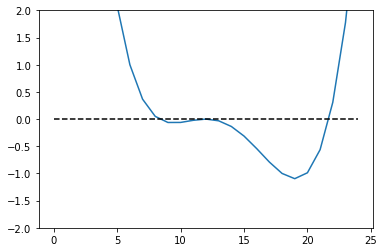

In [76]:
# 3 локальных экстремума
x = np.array([(x**4-x**3-x**2) for x in np.linspace(-2, 2, 25)])
plt.plot(x)
plt.ylim(-2,2)
plt.plot(np.zeros_like(x), "--", color="black")
plt.show()

### Задание 2
Посчитайте 1-ую и 2-ую производные функции (на бумажке):

$f(x) = sin^2(2x+1)$

In [23]:
import sympy as sy
sy.init_printing()
x = sy.Symbol('x')

def f(x):
    return sy.sin(2*x + 1)**2

In [24]:
def fo(x):
    return sy.diff(f(x), x)

fo(x)

In [25]:
def so(x):
    return sy.diff(f(x), x, x)

so(x)

### Задание 3:
Посчитайте частные производные функции в точкe (на бумажке или в LaTeX и на numpy):

$f(x,y)=2x^2y^3 + 1/x + y^2x + 7$ в точке $(1,2)$

$\frac{\partial f}{\partial x} = 4 x y^{3} + y^{2} - \frac{1}{x^{2}}$

$\frac{\partial f}{\partial y} = 2 x y \left(3 x y + 1\right)$

$f'(x) = 4 x y^{3} + y^{2} - \frac{1}{x^{2}}$

$f'(y) = 6 x^{2} y^{2} + 2 x y$

$f'(x)(1,2) = 4 \cdot 1 \cdot 2^{3} + 2^{2} - 1 \cdot 1^{2} = 35$

$f'(y)(1,2) = 6 \cdot 1^{2} \cdot 2^{2} + 2 \cdot 1 \cdot 2 = 28$

In [78]:
import numdifftools as nd

In [79]:
x, y = 1, 2
z = lambda xy: 2*xy[0]**2*xy[1]**3 + 1/xy[0] + xy[1]**2*xy[0] + 7
dz = nd.Gradient(z)
dz_dx, dz_dy = dz([x, y])
print('частные производные в точке (1,2) равны:', dz_dx, dz_dy)

частные производные в точке (1,2) равны: 35.0 28.00000000000001


C:\Users\JR\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in double_scalars
  


### Задание 4:
Градиентный спуск своими руками

In [34]:
def f(x):
    return (x[0]**2) + (x[1]**2)

In [35]:
x = np.array([100, 200])
lr = 0.1

In [36]:
for i in range(10000):
    grad = approx_fprime(x, f, lr)
    x = x - lr * grad 
print(x)

[-0.05 -0.05]


In [37]:
print("Минимум достигается в: ", x)
print("Значение функции в минимуме: ", f(x))

Минимум достигается в:  [-0.05 -0.05]
Значение функции в минимуме:  0.0049999999999999975


Проверка с помощью встроенной функции scipy:

In [38]:
grad_numpy = np.gradient(x)
print(grad_numpy)

[0. 0.]


In [39]:
from scipy.optimize import minimize
res = minimize(f, x, method='nelder-mead', options={'xtol': 1e-8, 'disp': True})

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 59
         Function evaluations: 109
